# Project Name - Mental Health in Tech Survey

## Project Type - EDA/Regression

## Contribution - Individual

## Team Member 1 - Sejal Rajore

# Project Summary - 

# Github Link - 

# Problem Statement

## Define Your Business Objective ?

# General Guidelines :-

# Let's Begin !

# 1. Know Your Data

## Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns             #  Seaborn is a data visualization library for Python.
import warnings                   # Warnings are provided to warn the developer of situations that aren’t necessarily exceptions.
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

## Dataset Loading

In [2]:
# Load Dataset
file_path = "C:/Users/sejal rajore/Downloads/survey.csv"
data = pd.read_csv(file_path)

## Dataset First View

In [3]:
# Dataset First View
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
data.shape

(1259, 27)

## Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

## Duplicate Values

In [7]:
# Dataset Duplicate Value count
data.duplicated().sum()

0

## Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum().sum()

1892

## What did you Know about your dataset ?

# 2. Understanding Your Variables

In [9]:
# Dataset Columns
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [ ]:
## Variable Description

In [11]:
data.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

## Cheack Unique Values for each variable.

In [12]:
# Check Unique Values For each variable.
data.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

# 3. Data Wrangling

## Data Wrangling Code

In [23]:
# Write your code to make your dataset analysis ready.

# Keep age between 18 and 100
data1 = data[(data['Age'] >= 18) & (data['Age'] <= 100)]

# Clean up and simplify gender values
data['Gender'] = data['Gender'].str.lower().str.strip()

def simplify_gender(g):
    if 'male' in g or g in ['m', 'man']:
        return 'Male'
    elif 'female' in g or g in ['f', 'woman']:
        return 'Female'
    else:
        return 'Other'

data['Gender'] = data['Gender'].apply(simplify_gender)
data.isnull().sum()

# Fill common missing values with "Don't know" or "No"
data['self_employed'].fillna("Don't know", inplace=True)
data['work_interfere'].fillna("Don't know", inplace=True)
data['state'].fillna("Not specified", inplace=True)

# Convert to consistent casing
yes_no_cols = [
    'self_employed', 'family_history', 'treatment', 'remote_work', 'tech_company',
    'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity',
    'mental_health_consequence', 'phys_health_consequence', 'obs_consequence',
    'mental_health_interview', 'phys_health_interview'
]

for col in yes_no_cols:
    data[col] = data[col].str.strip().str.title()

data['work_interfere'] = pd.Categorical(data['work_interfere'], 
    categories=['Never', 'Rarely', 'Sometimes', 'Often', "Don't know"])

data['leave'] = pd.Categorical(data['leave'], 
    categories=['Very easy', 'Somewhat easy', "Don't know", 'Somewhat difficult', 'Very difficult'])

data['mental_vs_physical'] = data['mental_vs_physical'].str.title()



## What all manipulations have you done and insights you found ?

# 4. Data Visualization , storytelling and Experimenting with charts: Understand the relationship between variables.

## Chart - 1. Age Distribution 

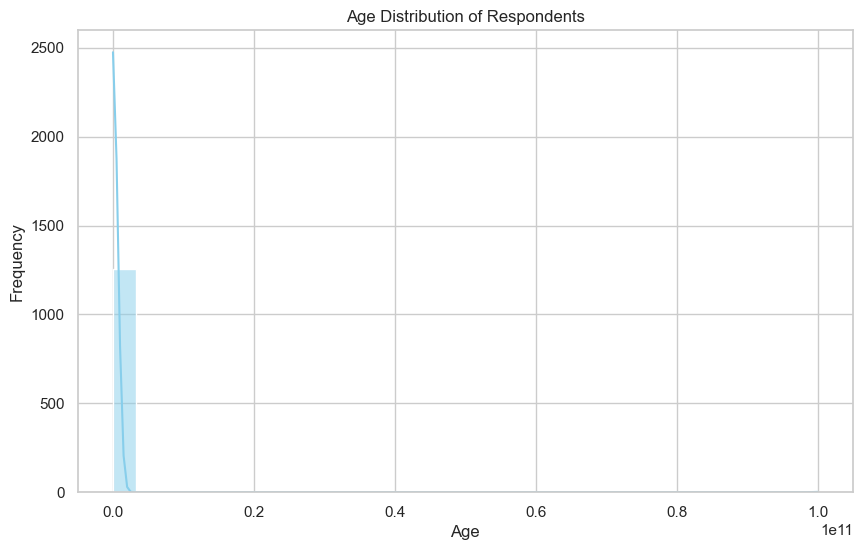

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## 1. what is/are insight(s) found from the chart ?

# chart - 2. Top 10 Countries by Response

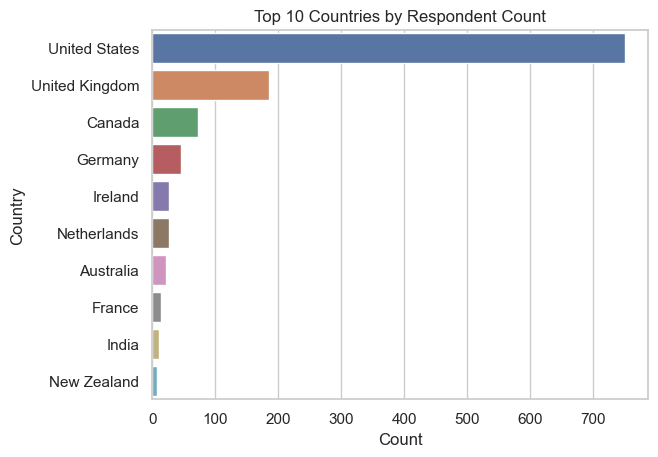

In [6]:
top_countries = data['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Respondent Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


##  1. What is/are the insight(s) found from the chart? 

# chart - 3. Self Employed Respondents

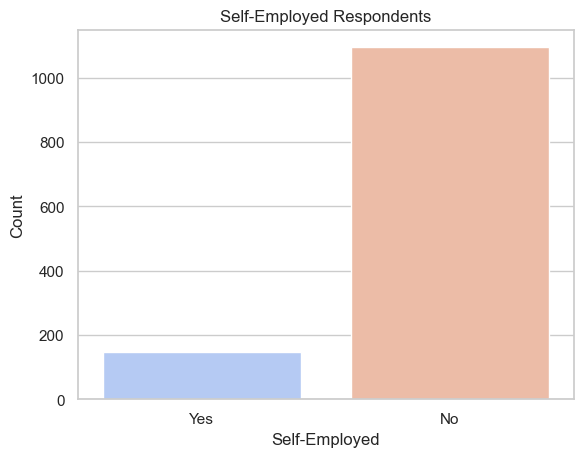

In [7]:
sns.countplot(x='self_employed', data=data, palette='coolwarm')
plt.title('Self-Employed Respondents')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()


## 1. what is/are insight(s) found from chart ? 

# chart - 4. Family History of Mental illness 

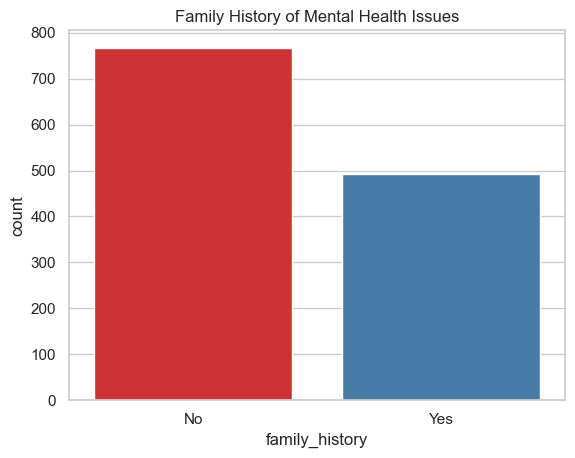

In [8]:
sns.countplot(x='family_history', data=data, palette='Set1')
plt.title('Family History of Mental Health Issues')
plt.show()


## 1. What is/are the insight(s) found from the chart?

# chart - 5. Company Size Distribution

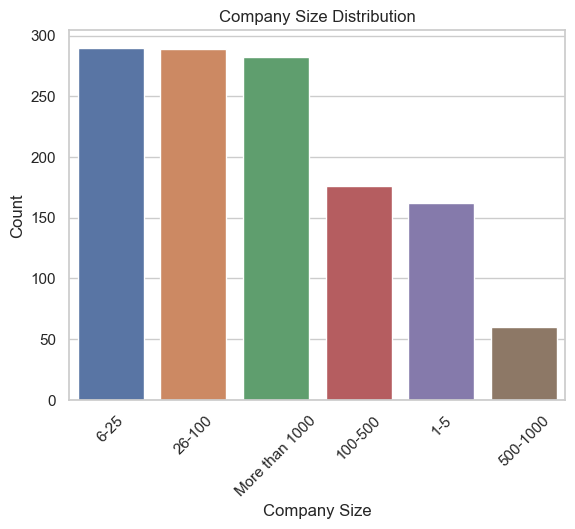

In [11]:
sns.countplot(x='no_employees', data=data, order=data['no_employees'].value_counts().index)
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##  1. What is/are the insight(s) found from the chart?

# chart - 6. Remote Work Possibility

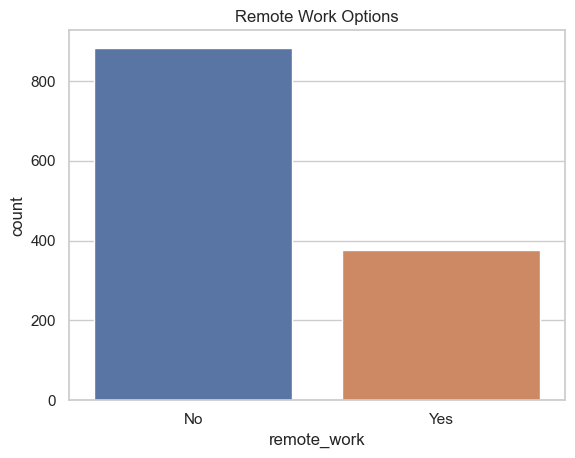

In [12]:
sns.countplot(x='remote_work', data=data)
plt.title('Remote Work Options')
plt.show()


##  1. What is/are the insight(s) found from the chart?

# chart - 7. Care Options Provided

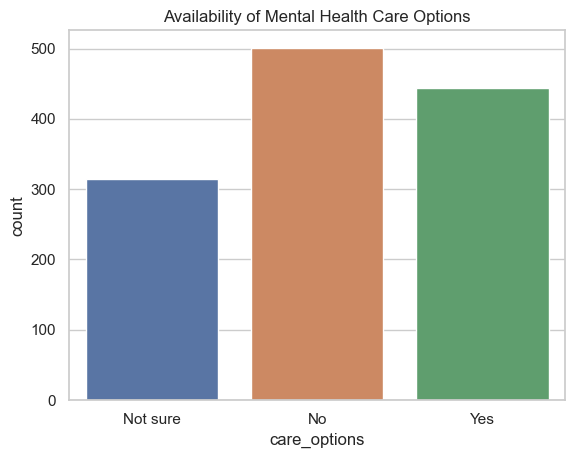

In [13]:
sns.countplot(x='care_options', data=data)
plt.title('Availability of Mental Health Care Options')
plt.show()


## 1. What is/are the insight(s) found from the chart?

# chart - 8. Ease of Taking Mental Health Leave

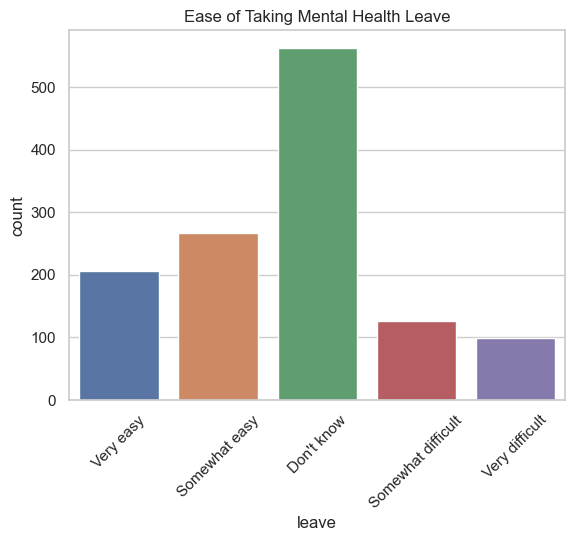

In [14]:
sns.countplot(x='leave', data=data, order=[
    'Very easy', 'Somewhat easy', "Don't know", 'Somewhat difficult', 'Very difficult'])
plt.title('Ease of Taking Mental Health Leave')
plt.xticks(rotation=45)
plt.show()


## 1. What is/are the insight(s) found from the chart?

# chart - 9. Wellness Program Availability

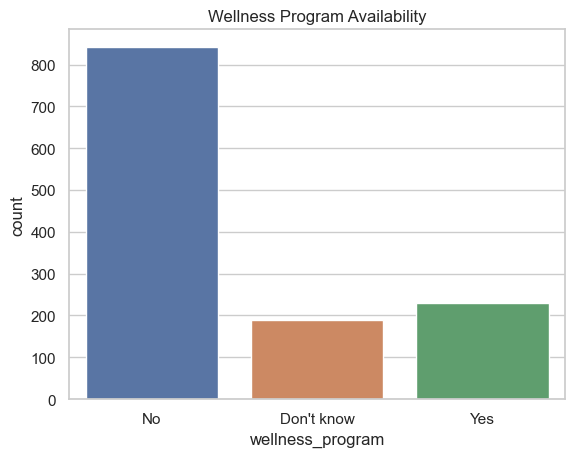

In [15]:
sns.countplot(x='wellness_program', data=data)
plt.title('Wellness Program Availability')
plt.show()


# 5. soultion to business objective 

## what do you suggest the client to achieve business objective ?

# conclusion 